# 8. Conducting $t$-tests using Caffeine and Sleep Variables

In [1]:
from datascience import *
import numpy as np
from scipy.stats import t

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

I keep some data frames in CSV format accessible from my website. One of them is called `personality.csv` and has, as you might imagine, personality variables. In this case, we will compare and contrast sleep and caffeine consumption levels based upon the grouping variables of biological sex and whether the students are at least 21 years old (Y/N response).

In [2]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/personality.csv')
pers.num_rows

129

In [3]:
pers

Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA,Sleep,Caff,SitClass,AccDate,Friends,TxRel,Stress1,Stress2,CHS,Thrill,Eat,TypeA,Anx,Opt,SE,Neuro,Perf,OCD,Play,Extro,Narc,HSAF,HSSE,HSAG,HSSD,PHS
21,2,M,Y,Y,1,N,N,N,3.23,3.5,2,F,N,O,25,15,10,28,23,45,31,30,27,61,29,105,10,142,8,11,41,40,26,27,SE
20,3,F,N,N,2,Y,N,Y,3.95,5.5,1,M,Y,E,15,13,11,29,25,32,32,37,23,60,44,105,3,172,16,11,46,52,26,33,SE
22,3,M,Y,N,2,N,N,N,3.06,8.5,1,B,Y,E,23,8,15,30,27,14,25,24,27,62,17,73,1,134,15,11,48,42,44,29,AG
27,3,F,Y,N,3,N,N,N,2.84,7,1,M,N,E,20,6,13,27,21,33,29,35,26,65,18,90,9,160,16,10,51,51,23,19,SE
24,3,M,Y,N,2,N,N,N,2.39,6,1,F,N,E,25,6,18,24,30,43,31,27,29,65,11,95,5,166,14,10,56,46,27,20,AF
22,3,F,Y,N,2,Y,N,N,2.63,6.5,0,F,N,E,18,17,12,16,26,39,31,34,20,68,43,114,20,133,10,9,40,27,31,28,AG
18,1,M,N,Y,1,N,N,N,3.17,6,3,M,Y,E,23,18,14,29,26,21,36,40,26,64,16,49,20,114,10,9,56,45,41,38,AG
20,3,F,N,N,1,Y,N,N,3.3,10,0,F,Y,E,22,16,17,29,17,42,32,41,21,50,45,142,17,168,16,9,55,45,24,29,AF
22,2,F,Y,N,1,N,N,N,3.02,3,6,B,N,O,24,18,18,31,21,42,30,58,8,45,73,119,16,141,10,9,52,47,32,26,SE
20,3,F,N,N,2,Y,N,N,3.22,3,0,M,N,E,20,14,14,20,18,42,36,43,17,60,54,117,16,136,5,9,34,32,32,32,AG


## Sleep and Caffeine Data

In [4]:
sleep = pers.select('Sex','Age','G21', 'Caff','Sleep')
sleep

Sex,Age,G21,Caff,Sleep
M,21,Y,2,3.5
F,20,N,1,5.5
M,22,Y,1,8.5
F,27,Y,1,7
M,24,Y,1,6
F,22,Y,0,6.5
M,18,N,3,6
F,20,N,0,10
F,22,Y,6,3
F,20,N,0,3


### Data Analysis

#### Pivot tables with third variable averaging

In [5]:
sleep.pivot('Sex','G21')

C:\Users\robbs\anaconda3\envs\datasci\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


G21,F,M
N,55,29
Y,19,26


In [6]:
sleep.pivot('Sex','G21','Sleep',np.average)

G21,F,M
N,6.56364,6.36207
Y,5.5,5.96154


In [7]:
sleep.pivot('Sex','G21','Caff',np.average)

G21,F,M
N,1.89091,1.89655
Y,2.89474,2.38462


From the pivot tables with averaging for Sleep and Caffeine, we see very little difference based on gender but more pronounced differences based on the "older than 21 years" variable (Y/N response).

### Histograms with grouping

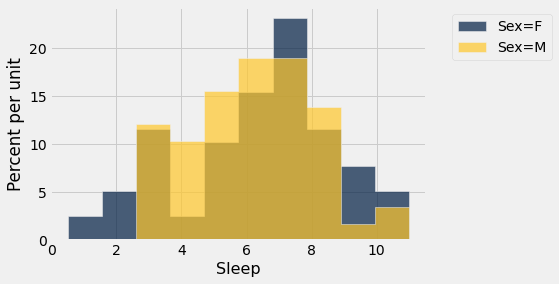

In [8]:
sleep.hist('Sleep',group='Sex')

C:\Users\robbs\anaconda3\envs\datasci\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


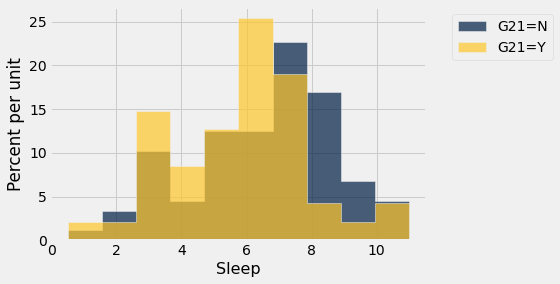

In [9]:
sleep.hist('Sleep',group='G21')

C:\Users\robbs\anaconda3\envs\datasci\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


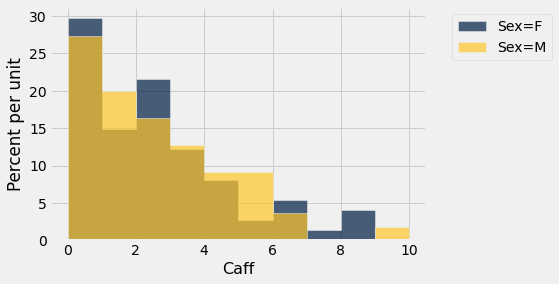

In [10]:
sleep.hist('Caff',group='Sex')

C:\Users\robbs\anaconda3\envs\datasci\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


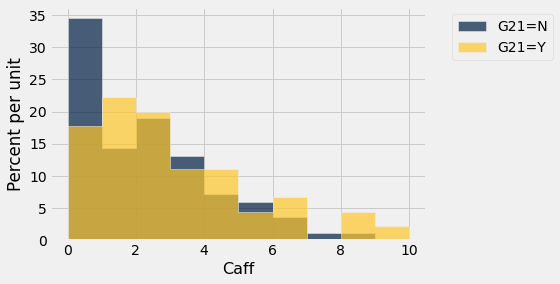

In [11]:
sleep.hist('Caff',group='G21')

## Applied Statistics

In the case of demographic grouping variables and a single numeric variables, resesearchers use a t-test which is calculated as

$$t = \frac{\bar x_1 - \bar x_2}{SE}$$

where the standard error is

$$SE = \sqrt{\frac{s_1^2}{n_1-1}+\frac{s_2^2}{n_2-2}}$$

We can create a couple simple functions for the standard error and degrees of freedom.

In [12]:
# Standard error for two sample t-test.
def se_t2(array1,array2):
    s1 = np.std(array1)
    s2 = np.std(array2)
    n1 = len(array1)
    n2 = len(array2)
    return np.sqrt(s1**2 / n1 + s2**2 / n2)

# The simplest calculation of degrees of freedom for two sample t-test.
def df_t2(array1,array2):
    n1 = len(array1)
    n2 = len(array2)
    return n1 + n2 - 2

# The t-test.
def t2(array1,array2):
    se = se_t2(array1, array2)
    df = df_t2(array1, array2)
    t_stat = ( np.average(array1) - np.average(array2) ) / se_t2(array1,array2)
    p_val = t.pdf(t_stat, df)
    print('t = ',t_stat)
    print('p = ', p_val)

### Creating arrays for Caff variable using G21 grouping and Sex grouping

In [13]:
caff_older = sleep.where('G21',"Y").column('Caff')
caff_younger = sleep.where('G21',"N").column('Caff')
caff_males =  sleep.where('Sex','M').column('Caff')
caff_females =  sleep.where('Sex','F').column('Caff')

#### $t$-tests for Caffeine differences

In [14]:
t2(caff_older,caff_younger)

t =  1.7169471147297453
p =  0.09167664854249422


In [15]:
t2(caff_males,caff_females)

t =  -0.056769284539958484
p =  0.39751164090201024


We find a significant difference based on age ($\alpha = 0.05$) but not based on gender.

### Creating arrays for Sleep variable using G21 grouping and Sex grouping

In [16]:
sleep_older = sleep.where('G21',"Y").column('Sleep')
sleep_younger = sleep.where('G21',"N").column('Sleep')
sleep_males =  sleep.where('Sex','M').column('Sleep')
sleep_females =  sleep.where('Sex','F').column('Sleep')

In [17]:
t2(sleep_older,sleep_younger)

t =  -1.9094401393859386
p =  0.06506537683749603


In [18]:
t2(sleep_males,sleep_females)

t =  -0.32350966692241356
p =  0.37771074891761297


As with caffeine, we find a significant difference in sleep based on age ($\alpha = 0.05$) but not based on gender.